In [1]:
# Cargamos los datos
load("ba_dataframe.Rdata", verbose = TRUE)

Loading objects:
  df
  coords


In [2]:
# Localizamos los NAs
naind <- which(is.na(df), arr.ind = TRUE)
length(naind)

[1] 221352

In [3]:
# Librerías a usar
library("mclust")
require(sp)
require(magrittr)

Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"

In [19]:
#df = df[-naind, ]

In [20]:
str(df)

'data.frame':	16200 obs. of  12 variables:
 $ Dec: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Jan: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Feb: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Mar: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Apr: num  0 0 0 0 0 0 0 NA NA NA ...
 $ May: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Jun: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Jul: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Aug: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Sep: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Oct: num  0 0 0 0 0 0 0 NA NA NA ...
 $ Nov: num  0 0 0 0 0 0 0 NA NA NA ...


In [11]:
summary(df)

      Dec             Jan             Feb             Mar       
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.000  
 Mean   :0.001   Mean   :0.001   Mean   :0.001   Mean   :0.001  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000  
 Max.   :0.198   Max.   :0.168   Max.   :0.512   Max.   :0.182  
 NA's   :9223    NA's   :9223    NA's   :9223    NA's   :9223   
      Apr             May             Jun             Jul       
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.000  
 Mean   :0.001   Mean   :0.001   Mean   :0.001   Mean   :0.001  
 3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000   3rd Qu.:0.000  
 Max.   :0.072   Max.   :0.117   Max.   :0.196   Max.   :0.306  
 NA's   :9223    NA's   :

In [10]:
#coords = coords[-naind, ]
str(coords)

'data.frame':	6970 obs. of  2 variables:
 $ x: num  -179 -179 -179 -179 -179 -179 -179 -179 -177 -177 ...
 $ y: num  -21 -19 -17 -15 65 67 69 71 -89 -87 ...
 - attr(*, "out.attrs")=List of 2
  ..$ dim     : Named int  180 90
  .. ..- attr(*, "names")= chr  "x" "y"
  ..$ dimnames:List of 2
  .. ..$ x: chr  "x=-179" "x=-177" "x=-175" "x=-173" ...
  .. ..$ y: chr  "y=-89" "y=-87" "y=-85" "y=-83" ...


## K-means

In [86]:
# Primer agrupamiento: usando K-Means
?kmeans

In [24]:
# Búsqueda del k óptimo

#' @title Best k-means model selection
#' @description Creates one k-means model for each value of k between 1 and K and plot their between clusters sum of squares and
#               their within cluster sum of squares
#' @param data Data frame
#' @param K number of groups
#' @param n.inits Number of initializations. Default to 10
#' @param itermax Maximun number of iterations. Default to 10
#' @return A list of k-means models, one for each value between 1 and K

selectBestkMeans <- function(data, K, itermax = 10, n.inits = 10) {
    km.list = list()
    km.b = c()
    km.tw = c()
    for (i in 1:K){
        km.list[[i]] = kmeans(x = data, centers = i, iter.max = itermax, nstart = n.inits)
        km.b[i] = km.list[[i]]$betweenss
        km.tw[i] = km.list[[i]]$tot.withinss
    }
    par(mfrow = c(2,2))
    plot(km.b, col = "blue", type = "b", xlab = "k", ylab = "ss", main = "ss between clusters")
    plot(km.tw, col = "red", type = "b", xlab = "k", ylab = "ss", main = "ss within clusters")
    return(km.list)
}

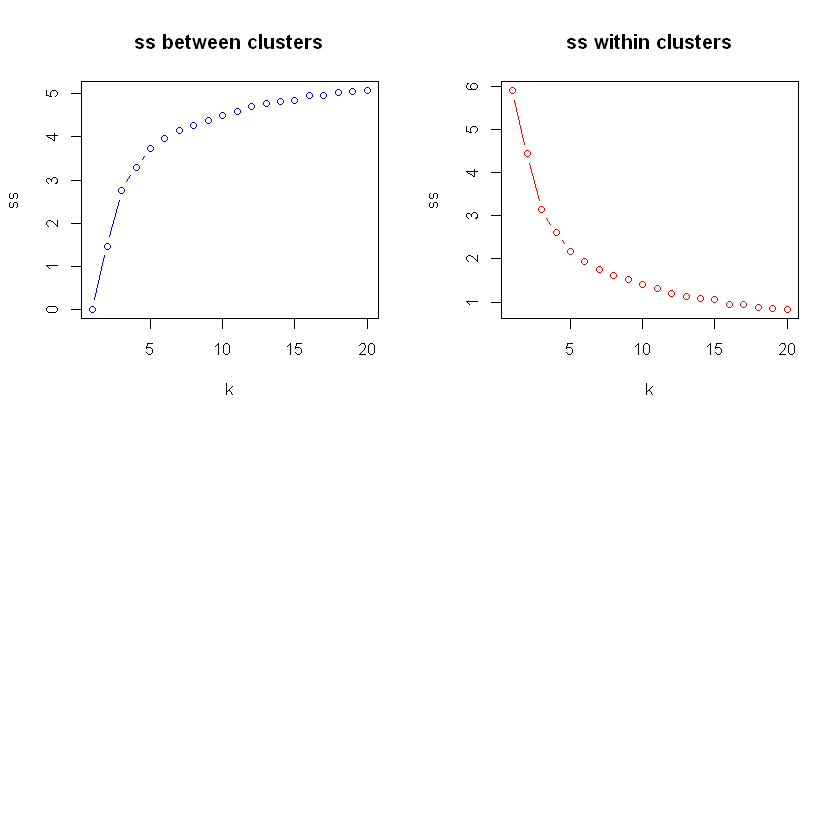

In [25]:
# Prueba con k = 1:20
set.seed(1)
km.15 <- selectBestkMeans(data = df[-naind, ], K = 20, itermax = 20, n.inits = 50)
# Lo más adecuado parece coger k = 7 mirando la gráfica de la izquierda

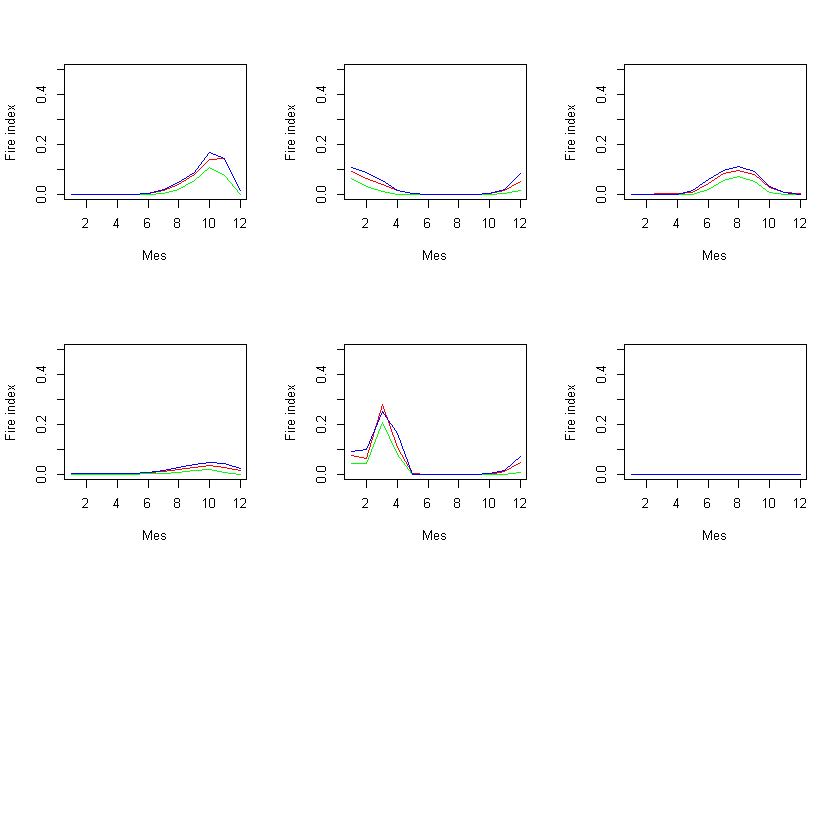

In [30]:
# si cogemos k=6
k = 6
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(km.15[[6]]$cluster == i),])
    d[i] = sum((df[-naind, ][which(km.15[[6]]$cluster == i),] - centroide)^2) / km.15[[6]]$size[i]
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.5), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(km.15[[6]]$cluster == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(km.15[[6]]$cluster == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
    #points(quantile(df[-naind, ][which(hc10 == i),], prob=c(0.25,0.75)))
    #points(centroide - d)
    #dd[i] = sum(var(df[-naind, ][which(hc10 == i),]))
    #centr = list(centr, centroide)
    #d[i] = sum(parDist(as.matrix(df[-naind, ][which(hc10 == i),]), method = "euclidean")) / sum(which(hc10 == i))
}

In [26]:
# Función para pintar los clusters
plotClust.kmeans <- function(df, coords, clus, ...) {
    arg.list <- list(...)
    # arg.list <- list()
    v <- numeric(nrow(df))
    v[naind] <- NA
    v[-naind] <- clus$cluster
    df1 <- cbind.data.frame(coords, v)
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    arg.list[["zcol"]] <- 1
    do.call("spplot", arg.list) %>% print()
    # spplot(df1, zcol = 1, at = seq(0,7,1))
    return(df1@data)
}

In [44]:
# Para los colores
require(RColorBrewer)
#display.brewer.all()
group.colors <- colorRampPalette(c(brewer.pal(8, "Dark2"), brewer.pal(8, "Accent")))

Loading required package: RColorBrewer


[1]   12   62   42  128    9 6717

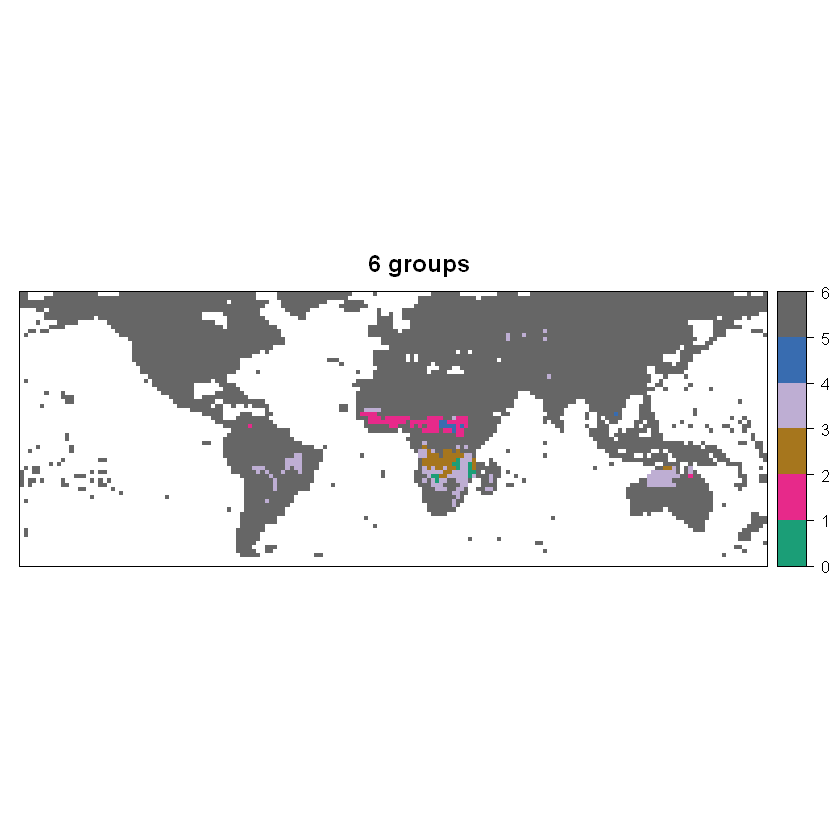

In [28]:
# 6 clusters
km.15[[6]]$size
km.df.6 <- plotClust.kmeans(df, coords, km.15[[6]], col.regions = group.colors(6),
                      at = seq(0, 6, 1), ylim = c(-60, 72), main = "6 groups")

[1] 6712   46   36   11    9  102   54

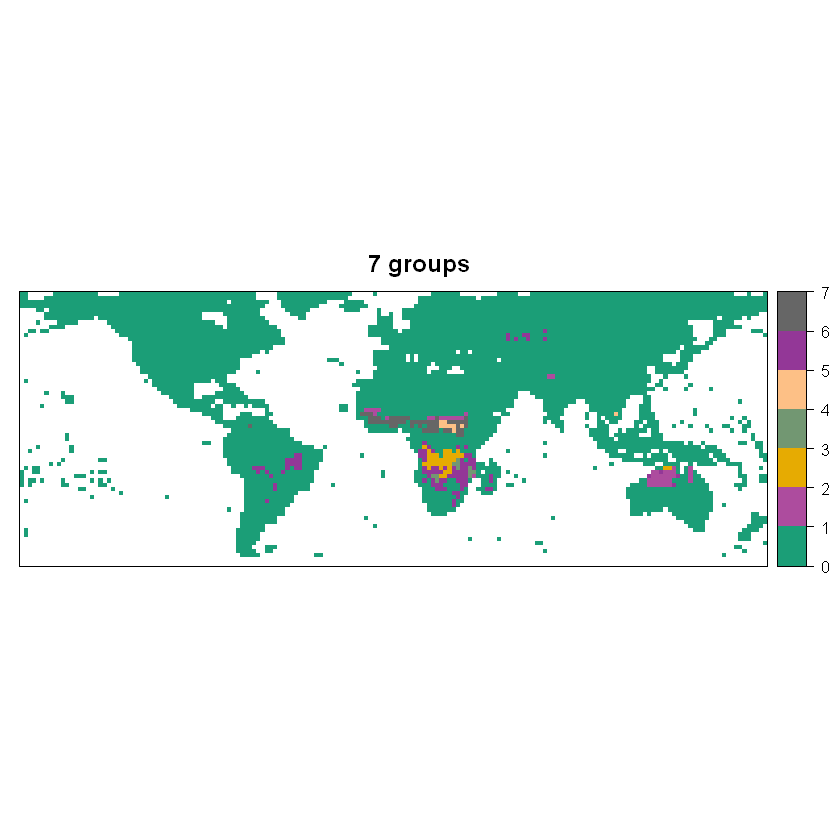

In [29]:
# 7 clusters
km.15[[7]]$size
km.df.7 <- plotClust.kmeans(df, coords, km.15[[7]], col.regions = group.colors(7),
                      at = seq(0, 7, 1), ylim = c(-60, 72), main = "7 groups")

A simple vista no veo grandes diferencias

## Hierarchical clustering (aglomerativo)

In [17]:
?hclust

In [15]:
library("parallelDist")

Warning message:
"package 'parallelDist' was built under R version 3.6.3"

In [16]:
dist.euclidean <- parDist(as.matrix(df[-naind, ]), method = "euclidean")

In [17]:
clus = hclust(dist.euclidean, method = "complete")

In [7]:
summary(hc10)

ERROR: Error in summary(hc10): objeto 'hc10' no encontrado


In [18]:
hc10 <- cutree(clus, k = 10)

In [13]:
centroide = colMeans(df[-naind, ][which(hc10 == 2),])

Dec          Jan          Feb          Mar          Apr          May 
1.633987e-04 3.267974e-05 6.535948e-05 3.267974e-05 7.843137e-04 3.790850e-03 
         Jun          Jul          Aug          Sep          Oct          Nov 
1.200692e-02 3.017301e-02 7.207612e-02 1.315225e-01 6.457516e-02 1.088235e-02

In [23]:
d = c()
dd = c()
centr = list()
for (i in 1:10){
    centroide = colMeans(df[-naind, ][which(hc10 == i),])
    d[i] = sum((df[-naind, ][which(hc10 == i),] - centroide)^2) / sum(hc10 == i)
    dd[i] = sum(var(df[-naind, ][which(hc10 == i),]))
    centr = list(centr, centroide)
    #d[i] = sum(parDist(as.matrix(df[-naind, ][which(hc10 == i),]), method = "euclidean")) / sum(which(hc10 == i))
}

In [24]:
print(d)
print(dd)

 [1] 0.0002526811 0.0456179342 0.0245919239 0.0777965926 0.0649840646
 [6] 0.0490395253 0.1328702247 0.0992211591 0.5342386574 0.2028505116
 [1] 0.0010100183 0.0161616453 0.0091270993 0.0145604924 0.0095929787
 [6] 0.0012791213 0.0006508149 0.0135918211 0.0011680556 0.0008858473


In [29]:
centr

[[1]]
[[1]][[1]]
[[1]][[1]][[1]]
[[1]][[1]][[1]][[1]]
[[1]][[1]][[1]][[1]][[1]]
[[1]][[1]][[1]][[1]][[1]][[1]]
[[1]][[1]][[1]][[1]][[1]][[1]][[1]]
[[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]]
[[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]]
[[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]]
list()

[[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]][[2]]
         Dec          Jan          Feb          Mar          Apr          May 
0.0004231111 0.0003366465 0.0003706667 0.0004475152 0.0004588283 0.0004395152 
         Jun          Jul          Aug          Sep          Oct          Nov 
0.0007536257 0.0010719144 0.0011747594 0.0011627807 0.0009746263 0.0007746263 


[[1]][[1]][[1]][[1]][[1]][[1]][[1]][[1]][[2]]
         Dec          Jan          Feb          Mar          Apr          May 
1.633987e-04 3.267974e-05 6.535948e-05 3.267974e-05 7.843137e-04 3.790850e-03 
         Jun          Jul          Aug          Sep          Oct          Nov 
1.200692e-02 3.017301e-02 7.207612e-02 1.315225e-01 6.457516e-02 1.088235e-02 


[[1]][[1]][[1]][[1]][[1]][[1]][[1]][[2]]
         Dec          Jan          Feb          Mar          Apr          May 
8.617886e-02 6.527100e-02 3.907859e-02 1.272358e-02 3.441734e-03 1.070461e-03 
         Jun          Jul          Aug          Sep          Oct          Nov 
2.152080e-04 8.608321e-05 8.608321e-05 6.743185e-04 9.037940e-03 4.196477e-02 


[[1]][[1]][[1]][[1]][[1]][[1]][[2]]
         Dec          Jan          Feb          Mar          Apr          May 
1.812698e-01 1.278571e-01 4.801587e-02 1.277778e-02 5.555556e-04 7.936508e-05 
         Jun          Jul          Aug          Sep          Oct          Nov 
0.000000e+00 0.000000e+00 8.403361e-05 5.882353e-04 5.158730e-03 6.888889e-02 


[[1]][[1]][[1]][[1]][[1]][[2]]
         Dec          Jan          Feb          Mar          Apr          May 
0.0000000000 0.0000617284 0.0000617284 0.0001234568 0.0045061728 0.0310493827 
         Jun          Jul          Aug          Sep          Oct          Nov 
0.0834640523 0.1247058824 0.1398692810 0.0236601307 0.0011111111 0.0000000000 


[[1]][[1]][[1]][[1]][[2]]
         Dec          Jan          Feb          Mar          Apr          May 
0.0001851852 0.0005555556 0.0015740741 0.0022222222 0.0237962963 0.0904629630 
         Jun          Jul          Aug          Sep          Oct          Nov 
0.1269607843 0.0819607843 0.0550000000 0.0091176471 0.0006481481 0.0000000000 


[[1]][[1]][[1]][[2]]
         Dec          Jan          Feb          Mar          Apr          May 
0.0001851852 0.0003703704 0.0020370370 0.0022222222 0.0101851852 0.0694444444 
         Jun          Jul          Aug          Sep          Oct          Nov 
0.1747058824 0.2262745098 0.0996078431 0.0147058824 0.0000000000 0.0000000000 


[[1]][[1]][[2]]
         Dec          Jan          Feb          Mar          Apr          May 
8.270833e-02 6.770833e-02 2.064583e-01 8.354167e-02 4.930556e-03 3.472222e-04 
         Jun          Jul          Aug          Sep          Oct          Nov 
7.352941e-05 0.000000e+00 1.470588e-04 8.823529e-04 1.743056e-02 5.881944e-02 


[[1]][[2]]
        Dec         Jan         Feb         Mar         Apr         May 
0.046388889 0.029722222 0.495833333 0.178611111 0.000000000 0.000000000 
        Jun         Jul         Aug         Sep         Oct         Nov 
0.000000000 0.000000000 0.000000000 0.000000000 0.003055556 0.021111111 


[[2]]
         Dec          Jan          Feb          Mar          Apr          May 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0002777778 0.0036111111 
         Jun          Jul          Aug          Sep          Oct          Nov 
0.0191176471 0.0423529412 0.0620588235 0.0914705882 0.3419444444 0.0002777778

In [96]:
selectBesthclust <- function(data, K = 15) {
    dist.euclidean <- parDist(as.matrix(df[-naind, ]), method = "euclidean")
    clus = hclust(dist.euclidean, method = "complete")
    err = c()
    #centr = list()
    for (k in 1:K){
        hc.k <- cutree(clus, k = k)
        d = c()
        for (i in 1:k){
            centroide = colMeans(df[-naind, ][which(hc.k == i),])
            d[i] = sum((df[-naind, ][which(hc.k == i),] - centroide)^2) / sum(hc.k == i)
            #centr = list(centr, centroide)
        }
        err[k] = sum(d)
    }
    plot(err, col = "red", type = "b", xlab = "k", ylab = "ss", main = "ss within clusters")
    return(err)
}

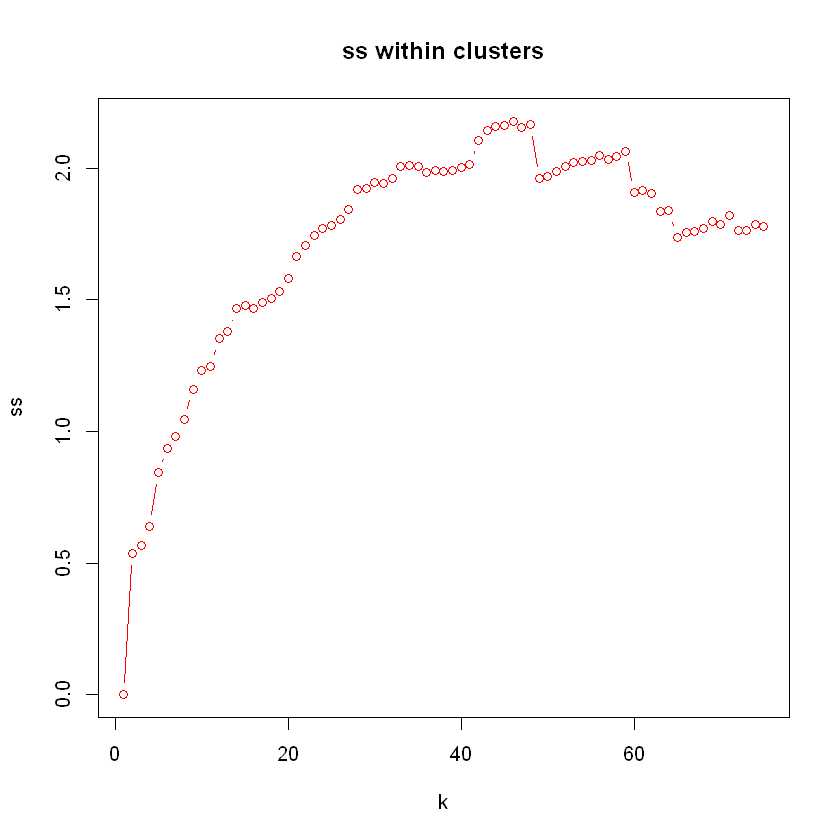

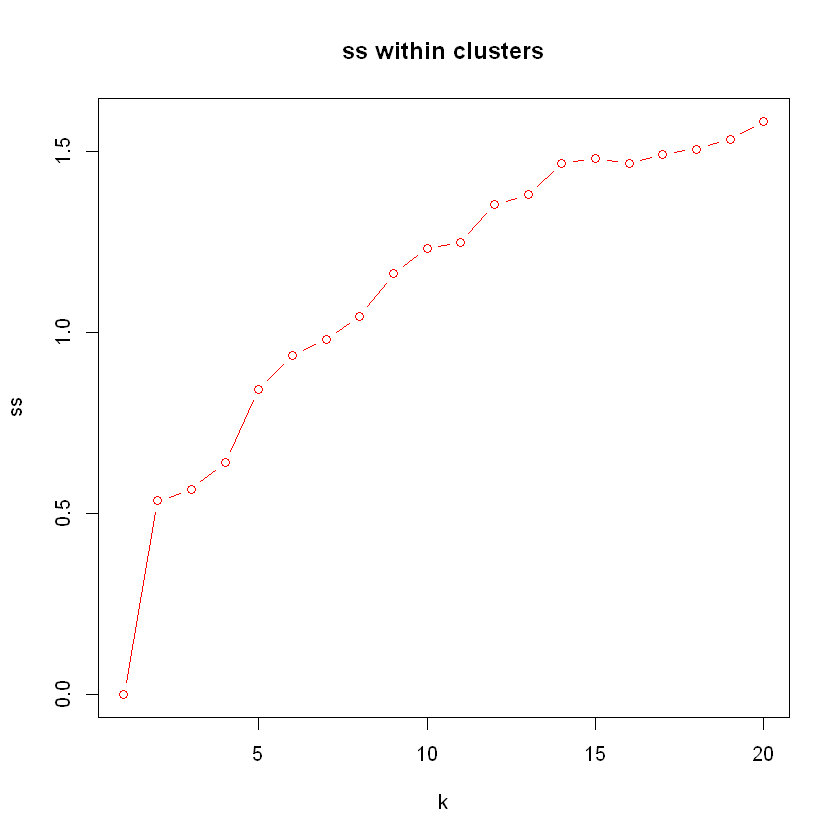

In [97]:
hc.75 <- selectBesthclust(data = df[-naind, ], K = 75)
hc.15 <- selectBesthclust(data = df[-naind, ], K = 20)

In [38]:
hc.15

[1] 6.240222e-33 6.240222e-33 6.240222e-33 6.240222e-33 6.240222e-33
 [6] 6.240222e-33 6.240222e-33 6.240222e-33 6.240222e-33 6.240222e-33
[11] 6.240222e-33 6.240222e-33 6.240222e-33 6.240222e-33 6.240222e-33

In [39]:
plotClust.hclust <- function(df, coords, clus, ...) {
    arg.list <- list(...)
    # arg.list <- list()
    v <- numeric(nrow(df))
    v[naind] <- NA
    v[-naind] <- clus
    df1 <- cbind.data.frame(coords, v)
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    arg.list[["zcol"]] <- 1
    do.call("spplot", arg.list) %>% print()
    # spplot(df1, zcol = 1, at = seq(0,7,1))
    return(df1@data)
}

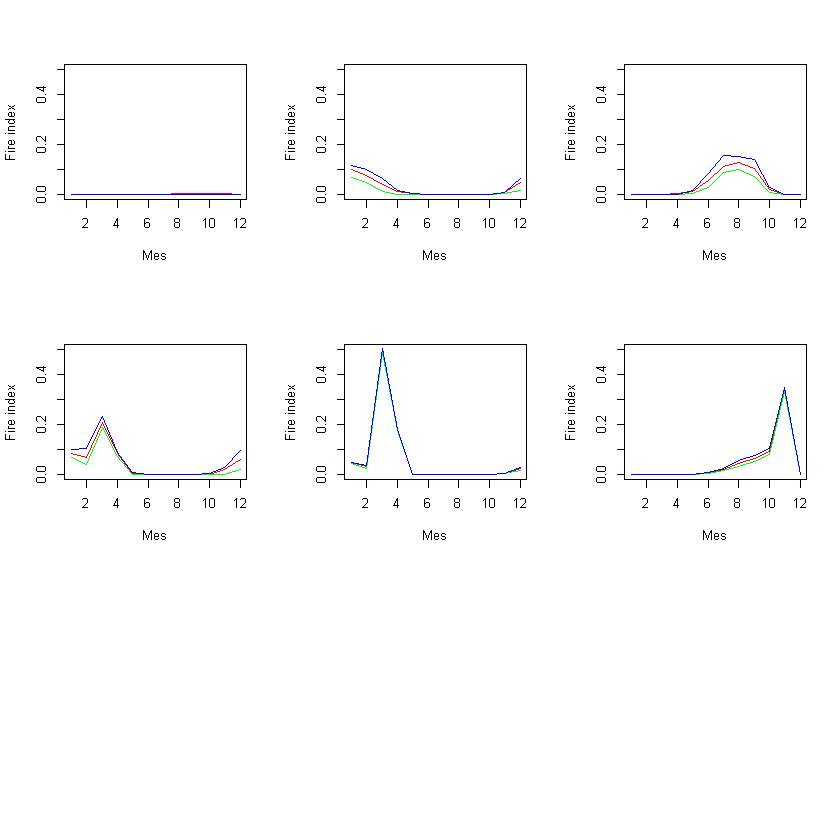

In [23]:
# si cogemos k=6
k = 6
hc6 <- cutree(clus, k = k)
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(hc6 == i),])
    d[i] = sum((df[-naind, ][which(hc6 == i),] - centroide)^2) / sum(hc6 == i)
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.5), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(hc6 == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(hc6 == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
    #points(quantile(df[-naind, ][which(hc10 == i),], prob=c(0.25,0.75)))
    #points(centroide - d)
    #dd[i] = sum(var(df[-naind, ][which(hc10 == i),]))
    #centr = list(centr, centroide)
    #d[i] = sum(parDist(as.matrix(df[-naind, ][which(hc10 == i),]), method = "euclidean")) / sum(which(hc10 == i))
}

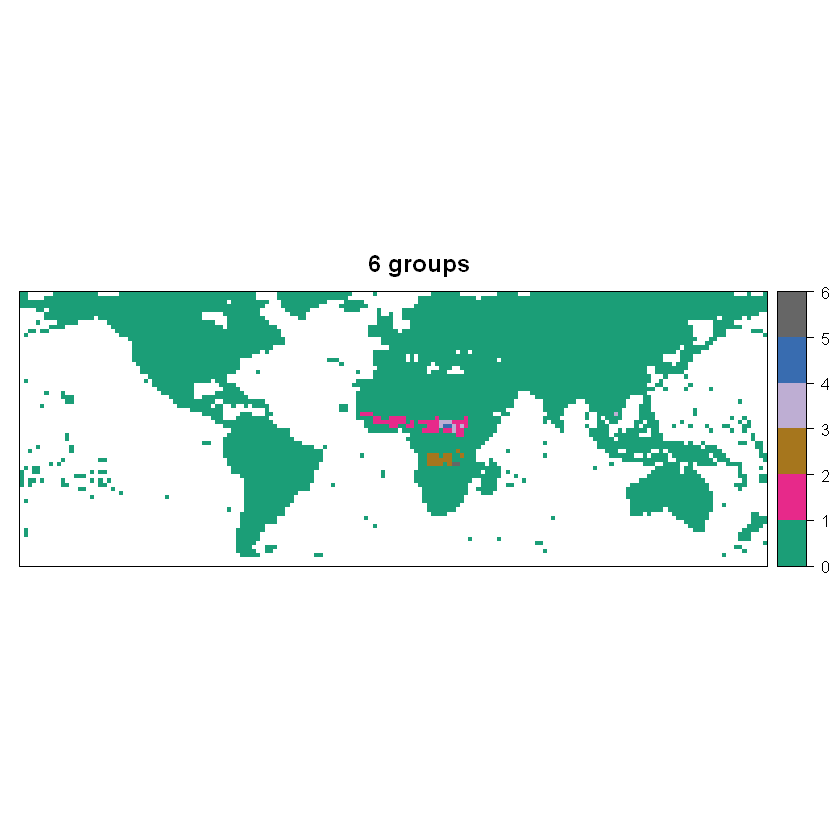

In [45]:
p = plotClust.hclust(df, coords, hc6, col.regions = group.colors(6),
                      at = seq(0, 6, 1), ylim = c(-60, 72), main = "6 groups")

In [30]:
?fviz_nbclust

In [29]:
library("factoextra")

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


## Gaussian Mixtures

multimodality tests are a useful tool for determining the number of fire peaks along the year. The periodicity of climatological and human–altered fires and their complex distributional features motivate the use of the nonparametric circular statistics. (Ameijeiras et al 2020)


In [87]:
# Segundo agrupamiento: usando gaussian mixtures
library(mclust)
?Mclust

In [89]:
#' @title Best GMM model selection
#' @description Retain the lowest BIC model after an arbitary number of GMM initializations
#' @param data Data frame
#' @param K number of groups
#' @param n.inits Number of initializations. Default to 10
#' @return A mclust-class model
#' @importFrom mclust Mclust

selectBestGMM <- function(data, K, n.inits = 10) {
    i <- 1
    gmm.list <- rep(list(bquote(), n.inits))
    while (i <= n.inits) {
        gmm.list[[i]] <- Mclust(data, G = 1:K)  
        i <- i + 1
    } 
    bics <- numeric(length(gmm.list))
    for (i in 1:length(gmm.list)) {
        bics[i] <- gmm.list[[i]]$bic
    }
    gmm <- gmm.list[[which.min(bics)]]
    message("Lowest BIC: ", round(min(bics), 2))
    message("Number of clusters:", gmm$G)
    return(gmm)
}

In [26]:
library(mclust)
gmm7 <- selectBestGMM(data = df[-naind, ], K = 7)

Lowest BIC: 812976
Number of clusters:4


In [22]:
plotClust.gmm <- function(df, coords, clus, ...) {
    arg.list <- list(...)
    # arg.list <- list()
    v <- numeric(nrow(df))
    v[naind] <- NA
    v[-naind] <- clus$classification
    df1 <- cbind.data.frame(coords, v)
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    arg.list[["zcol"]] <- 1
    do.call("spplot", arg.list) %>% print()
    # spplot(df1, zcol = 1, at = seq(0,7,1))
    return(df1@data)
}

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood    n  df      BIC      ICL
       409803.5 6970 327 816713.2 809040.1

Clustering table:
   1    2    3    4 
 592  388 5868  122 

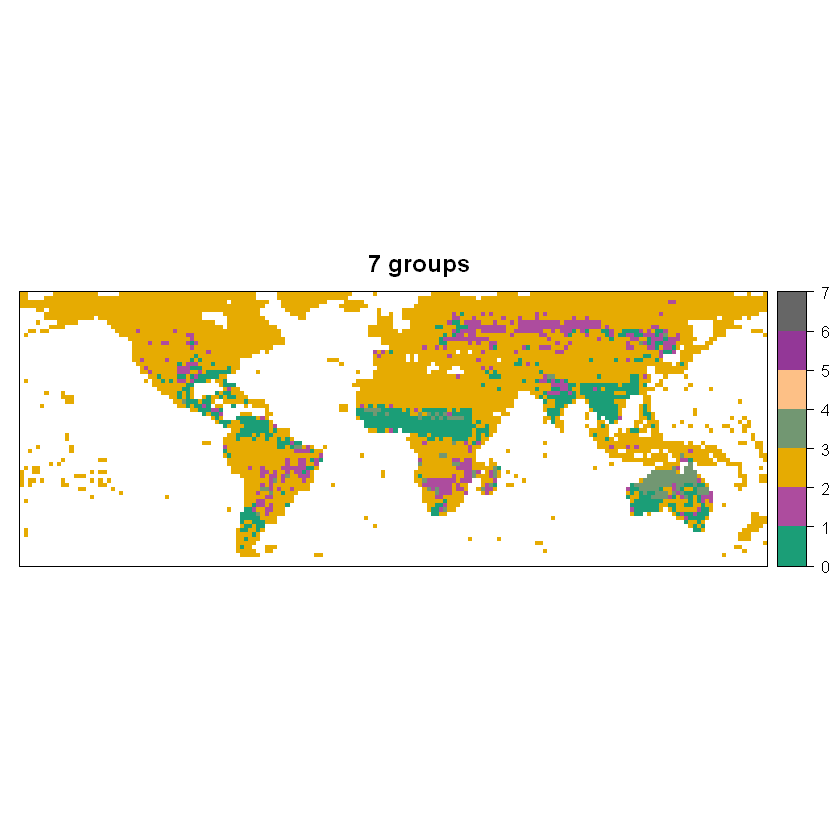

In [23]:
summary(gmm7)
gmm.df.7 <- plotClust.gmm(df, coords, gmm7, col.regions = group.colors(7),
                      at = seq(0, 7, 1), ylim = c(-60, 72), main = "7 groups")

In [24]:
gmm7 <- selectBestGMM(data = df[-naind, ], K = 7)
gmm8 <- selectBestGMM(data = df[-naind, ], K = 8)
gmm9 <- selectBestGMM(data = df[-naind, ], K = 9)
gmm10 <- selectBestGMM(data = df[-naind, ], K = 10)
gmm11 <- selectBestGMM(data = df[-naind, ], K = 11)
# gmm12 <- selectBestGMM(data = df[-naind, ], K = 12)
# gmm13 <- selectBestGMM(data = df[-naind, ], K = 13)
# gmm14 <- selectBestGMM(data = df[-naind, ], K = 14)


Lowest BIC: 836209.17
Number of clusters:4
Lowest BIC: 839496.06
Number of clusters:6
Lowest BIC: 838851.26
Number of clusters:6
Lowest BIC: 850932.98
Number of clusters:8
Lowest BIC: 832480.1
Number of clusters:6


In [90]:
gmm12 <- selectBestGMM(data = df[-naind, ], K = 12)
gmm13 <- selectBestGMM(data = df[-naind, ], K = 13)
gmm14 <- selectBestGMM(data = df[-naind, ], K = 14)

Lowest BIC: 808291.74
Number of clusters:4
Lowest BIC: NA
Number of clusters:7
Lowest BIC: NA
Number of clusters:7


In [92]:
gmm15 <- selectBestGMM(data = df[-naind, ], K = 15)

Lowest BIC: 876892.91
Number of clusters:13


In [93]:
summary(gmm12)
summary(gmm13)
summary(gmm14)
summary(gmm15)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood    n  df      BIC    ICL
       405592.7 6970 327 808291.7 803480

Clustering table:
   1    2    3    4 
 210   15  651 6094 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 7 components: 

 log-likelihood    n  df      BIC      ICL
       412520.2 6970 564 820049.4 811060.1

Clustering table:
   1    2    3    4    5    6    7 
 420   37  175  106 5893  216  123 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 7 components: 

 log-likelihood    n  df      BIC      ICL
       428398.5 6970 564 851805.9 842016.2

Clustering table:
   1    2    3    4    5    6    7 
  86  577   31  228   69  326 5653 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 13 components: 

 log-likelihood    n   df      BIC      ICL
       443039.3 6970 1038 876892.9 867159.4

Clustering table:
   1    2    3    4    5    6    7    8    9   10   11   12   13 
 146  322  146   64  125   46  167   25   47   36   43 5698  105 

In [25]:
summary(gmm7)
summary(gmm8)
summary(gmm9)
summary(gmm10)
summary(gmm11)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVV (ellipsoidal, equal volume) model with 4 components: 

 log-likelihood    n  df      BIC      ICL
       419697.5 6970 360 836209.2 830910.1

Clustering table:
   1    2    3    4 
 727 5829  195  219 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 6 components: 

 log-likelihood    n  df      BIC      ICL
         421894 6970 485 839496.1 833127.4

Clustering table:
   1    2    3    4    5    6 
 603   49  115  243 5921   39 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 6 components: 

 log-likelihood    n  df      BIC      ICL
       421571.6 6970 485 838851.3 833696.1

Clustering table:
   1    2    3    4    5    6 
 361 5933  255  175   36  210 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 8 components: 

 log-likelihood    n  df    BIC      ICL
       428311.6 6970 643 850933 843265.9

Clustering table:
   1    2    3    4    5    6    7    8 
 412 5825   76  180   31  266   94   86 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 6 components: 

 log-likelihood    n  df      BIC      ICL
         418386 6970 485 832480.1 825744.3

Clustering table:
   1    2    3    4    5    6 
5900  507  308  147   10   98 

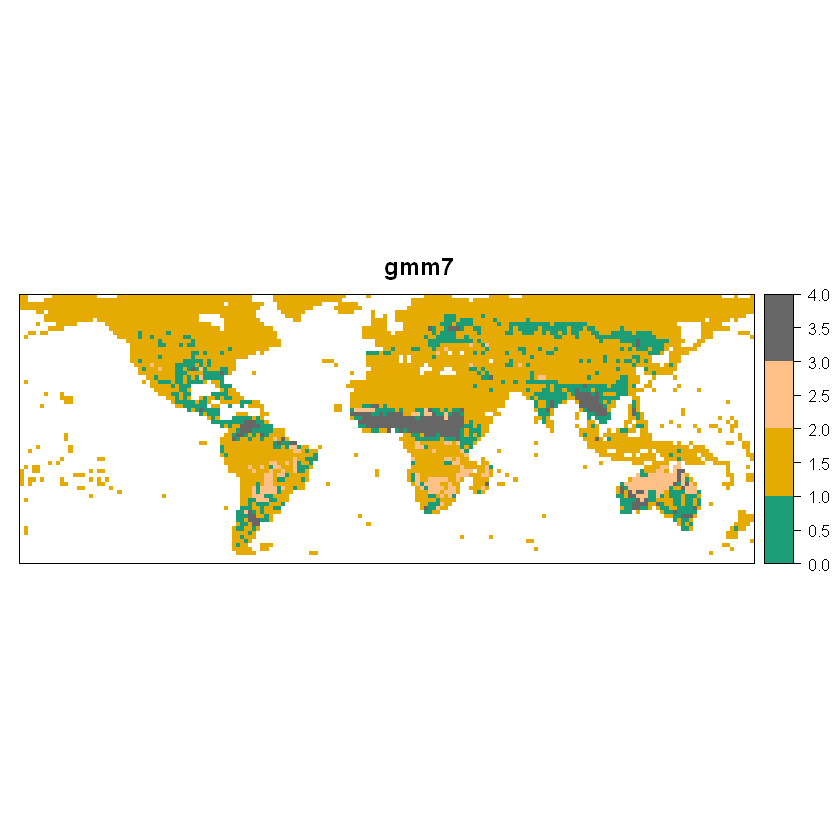

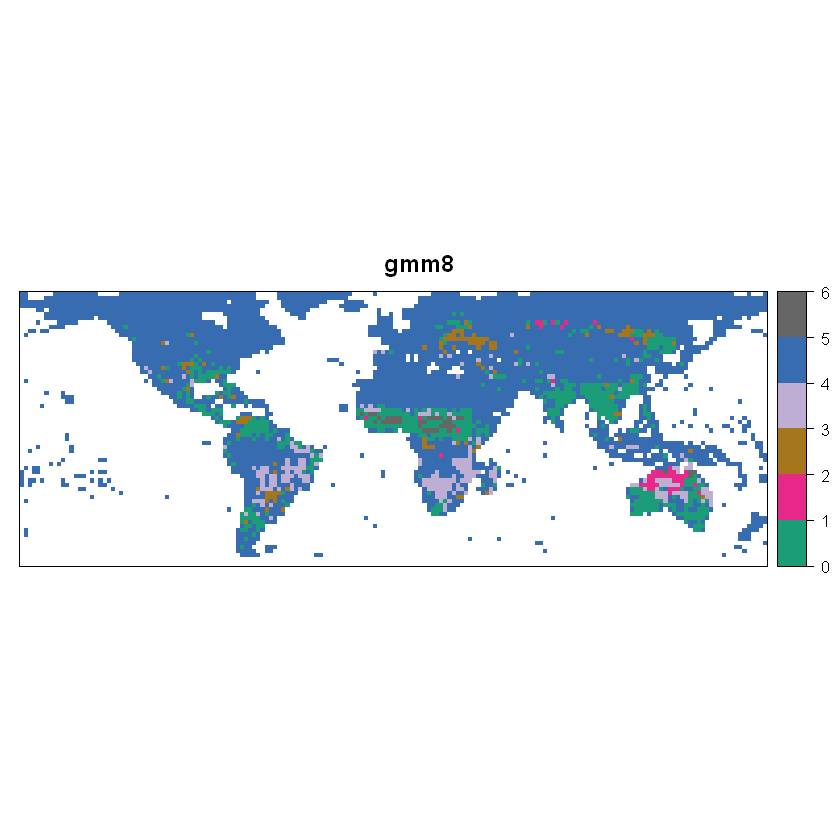

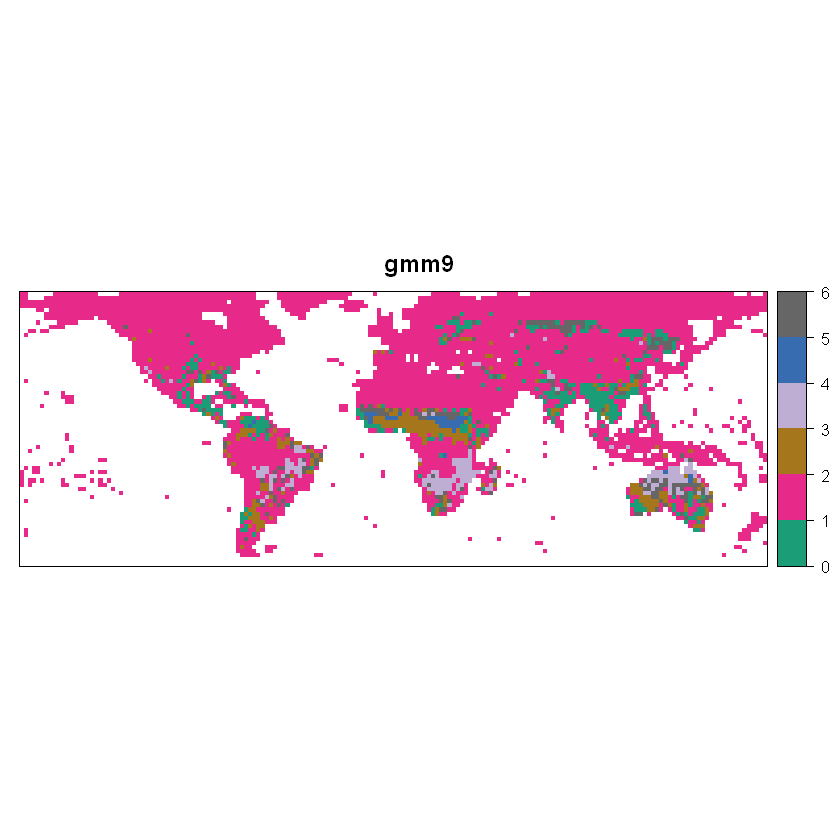

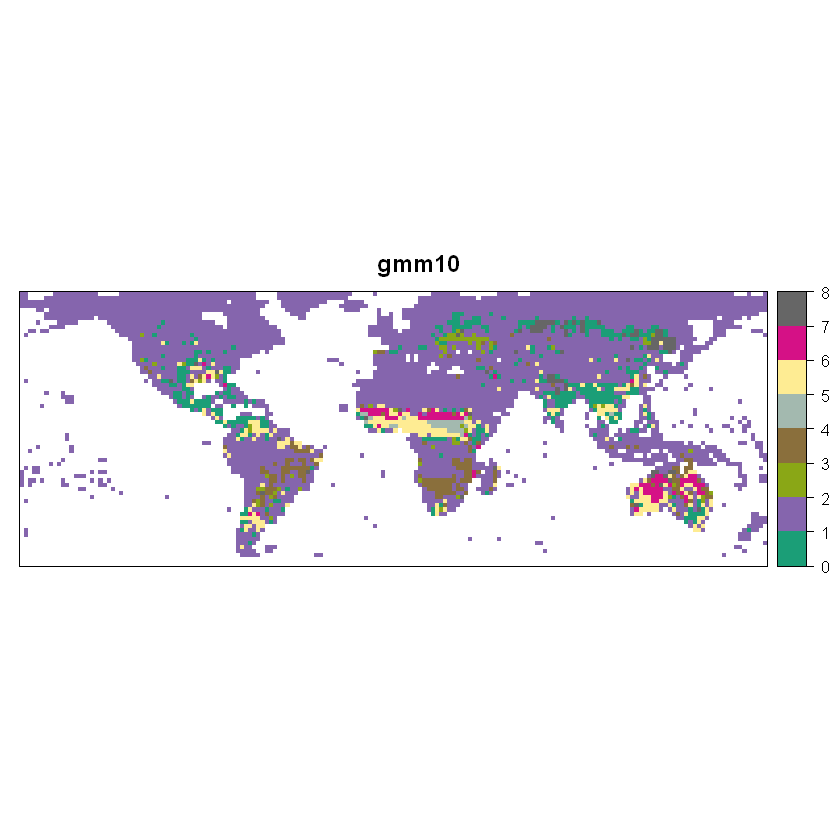

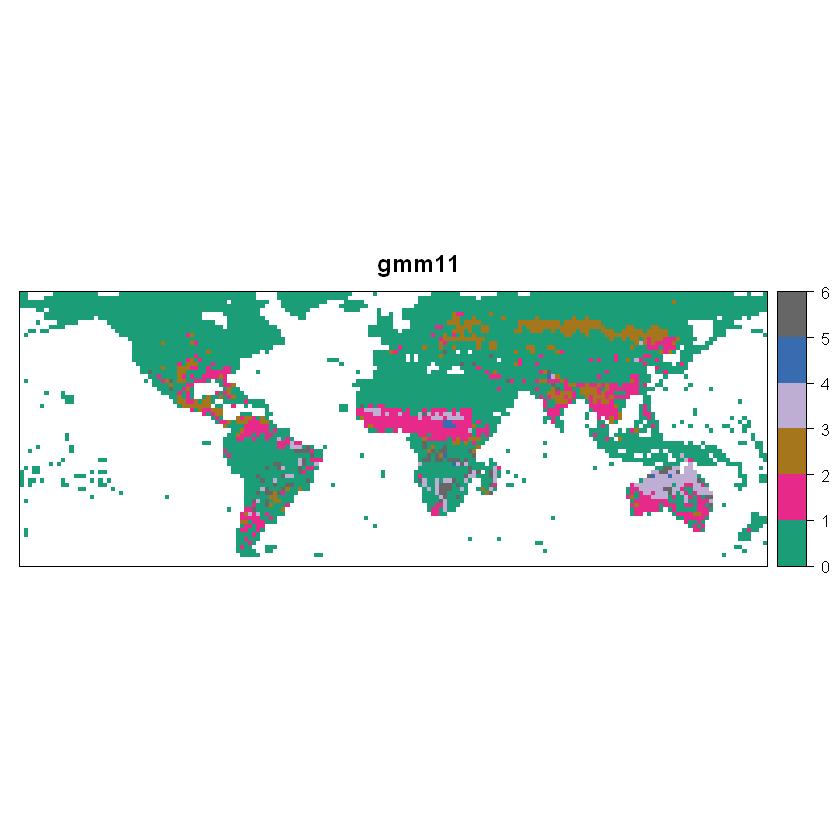

In [50]:
gmm.df.7 <- plotClust.gmm(df, coords, gmm7, col.regions = group.colors(4),
                      at = seq(0, 4, 1), ylim = c(-60, 72), main = "gmm7")
gmm.df.8 <- plotClust.gmm(df, coords, gmm8, col.regions = group.colors(6),
                      at = seq(0, 6, 1), ylim = c(-60, 72), main = "gmm8")
gmm.df.9 <- plotClust.gmm(df, coords, gmm9, col.regions = group.colors(6),
                      at = seq(0, 6, 1), ylim = c(-60, 72), main = "gmm9")
gmm.df.10 <- plotClust.gmm(df, coords, gmm10, col.regions = group.colors(8),
                      at = seq(0, 8, 1), ylim = c(-60, 72), main = "gmm10")
gmm.df.11 <- plotClust.gmm(df, coords, gmm11, col.regions = group.colors(6),
                      at = seq(0, 6, 1), ylim = c(-60, 72), main = "gmm11")

In [5]:
library(mclust)
gmm8 <- selectBestGMM(data = df[-naind, ], K = 8)

Lowest BIC: NA
Number of clusters:6


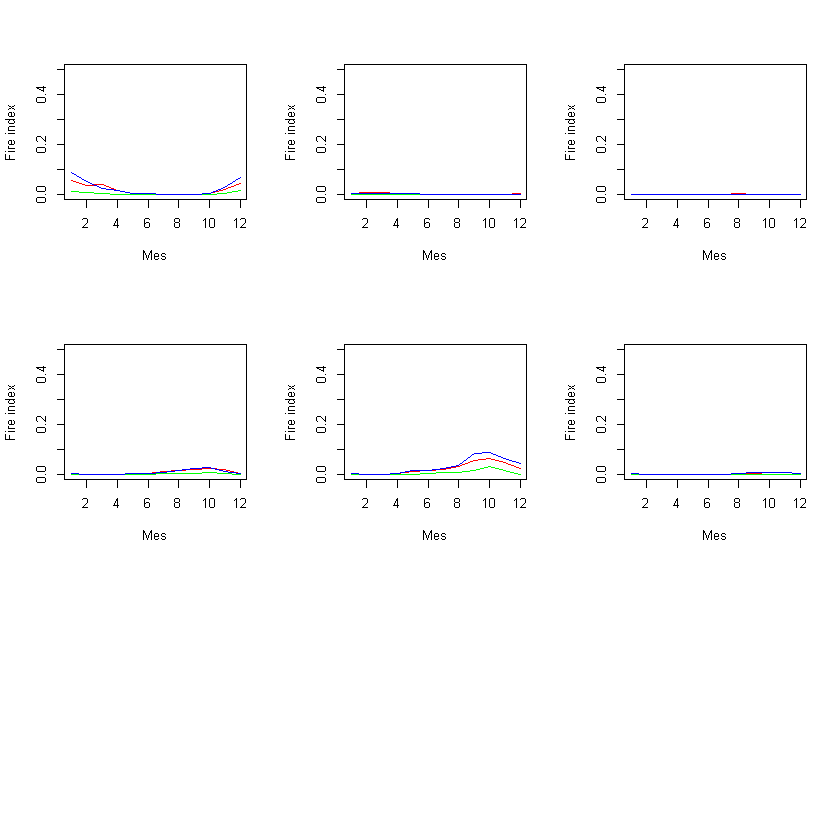

In [31]:
# si cogemos k=6
k = 6
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(gmm8$classification == i),])
    d[i] = sum((df[-naind, ][which(gmm8$classification == i),] - centroide)^2) / sum(gmm8$classification == i)
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.5), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(gmm8$classification == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(gmm8$classification == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
    #points(quantile(df[-naind, ][which(hc10 == i),], prob=c(0.25,0.75)))
    #points(centroide - d)
    #dd[i] = sum(var(df[-naind, ][which(hc10 == i),]))
    #centr = list(centr, centroide)
    #d[i] = sum(parDist(as.matrix(df[-naind, ][which(hc10 == i),]), method = "euclidean")) / sum(which(hc10 == i))
}

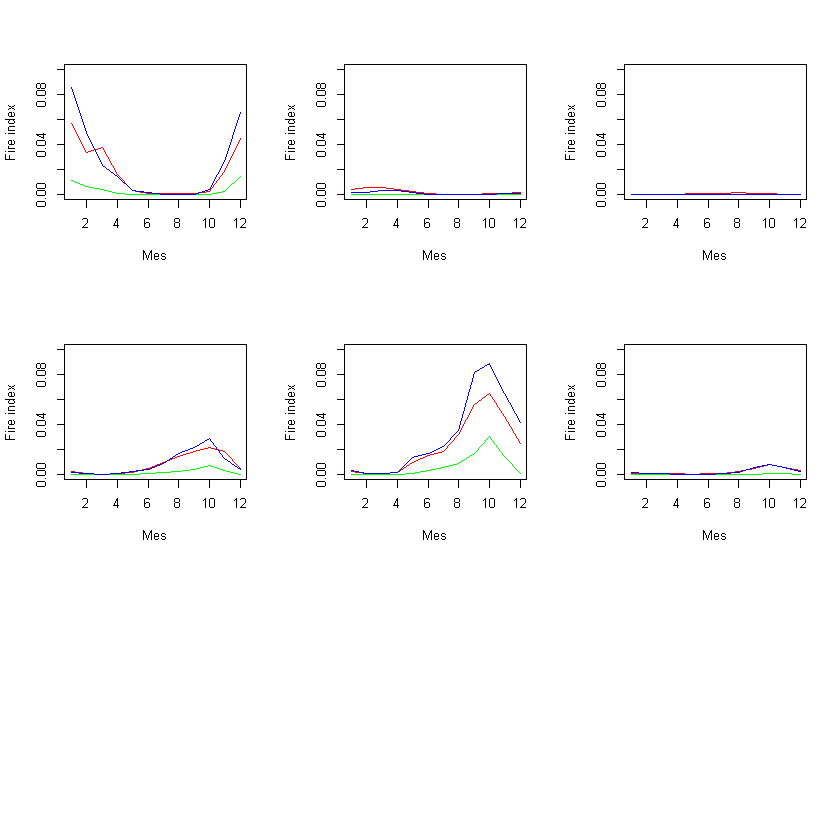

In [99]:
# si cogemos k=6
k = 6
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(gmm8$classification == i),])
    d[i] = sum((df[-naind, ][which(gmm8$classification == i),] - centroide)^2) / sum(gmm8$classification == i)
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.1), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(gmm8$classification == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(gmm8$classification == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
    #points(quantile(df[-naind, ][which(hc10 == i),], prob=c(0.25,0.75)))
    #points(centroide - d)
    #dd[i] = sum(var(df[-naind, ][which(hc10 == i),]))
    #centr = list(centr, centroide)
    #d[i] = sum(parDist(as.matrix(df[-naind, ][which(hc10 == i),]), method = "euclidean")) / sum(which(hc10 == i))
}

# SOM

In [44]:
library(kohonen)
? som ## Clustering function

In [34]:
? somgrid ## Definition of the topology.

SOM of size 6x1 with a rectangular topology and a bubble neighbourhood function.
The number of data layers is 1.
Distance measure(s) used: sumofsquares.
Training data included: 6970 objects.
Mean distance to the closest unit in the map: 0.


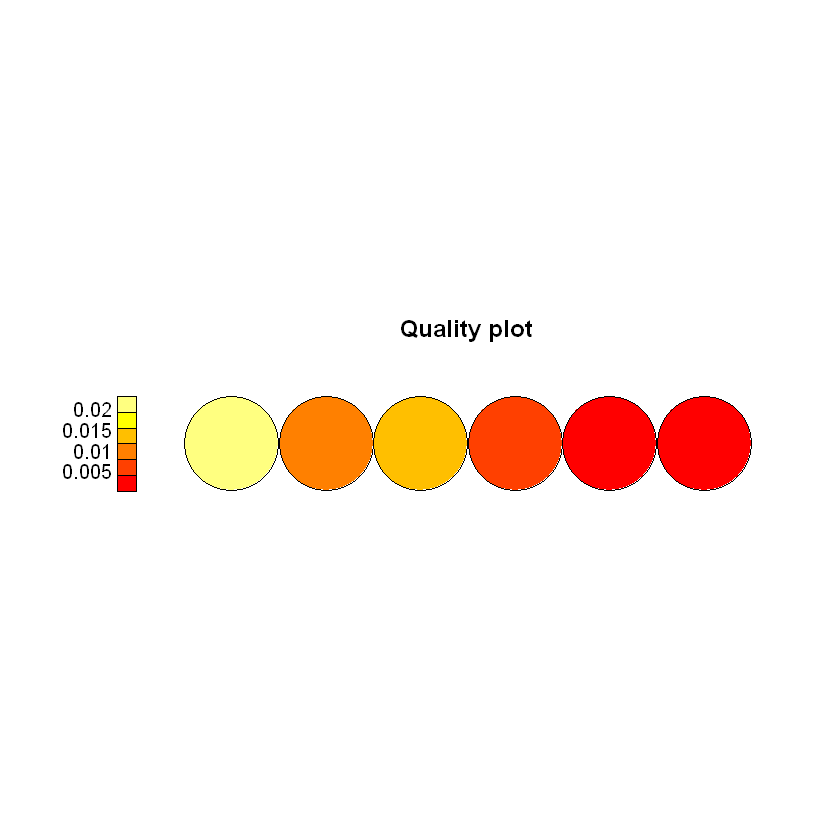

In [39]:
som <- som(as.matrix(df[-naind, ]), somgrid(xdim=6, ydim=1, topo="rectangular"))
## Should be used to visualize the data:
plot(som, type = "quality")
summary(som)

In [40]:
som$distances

[1] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
   [6] 1.490278e-06 1.114520e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [11] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [16] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [21] 1.671644e-06 1.671644e-06 1.490278e-06 1.671644e-06 1.671644e-06
  [26] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [31] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [36] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [41] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [46] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [51] 1.490278e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [56] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [61] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [66] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [71] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [76] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [81] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [86] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [91] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
  [96] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [101] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [106] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [111] 1.671644e-06 1.671644e-06 5.725254e-06 1.671644e-06 1.490278e-06
 [116] 1.490278e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [121] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [126] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.295887e-06
 [131] 1.646985e-06 1.671644e-06 1.490278e-06 1.625196e-06 1.671644e-06
 [136] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [141] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [146] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [151] 2.314366e-06 1.901478e-05 2.267918e-06 2.000954e-06 1.646985e-06
 [156] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [161] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [166] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [171] 1.671644e-06 2.448013e-06 2.723366e-05 1.465619e-06 1.671644e-06
 [176] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [181] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [186] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 3.492424e-06
 [191] 3.627341e-06 1.207015e-05 7.042580e-06 2.000954e-06 1.671644e-06
 [196] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [201] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [206] 1.671644e-06 1.180126e-05 1.422707e-04 3.144196e-06 1.490278e-06
 [211] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [216] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [221] 1.671644e-06 3.356235e-06 1.114520e-06 3.309930e-05 4.271538e-05
 [226] 7.513689e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [231] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [236] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.413512e-06
 [241] 2.677370e-05 2.520546e-05 1.271227e-06 1.671644e-06 1.671644e-06
 [246] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [251] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.824463e-06
 [256] 7.624383e-05 3.062409e-05 1.295887e-06 1.671644e-06 1.671644e-06
 [261] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [266] 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06 1.671644e-06
 [271] 1.671644e-06 1.671644e-06 1.465619e-06 3.952935e-05 1.453454e-05
 [276] 1.295887e-06 1.671644e-06 1.671644e-

In [45]:
som$unit.classif

[1] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
  [38] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
  [75] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [112] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [149] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [186] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [223] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [260] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [297] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [334] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [371] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [408] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [445] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [482] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [519] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [556] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [593] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [630] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [667] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [704] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [741] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [778] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [815] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [852] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [889] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [926] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [963] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1000] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1037] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1074] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1111] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1148] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1185] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1222] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1259] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1296] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1333] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1370] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1407] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1444] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1481] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1518] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1555] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1592] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1629] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 6 6 6 6 6 6 6 6 6 6 6
[1666] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1703] 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1740] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5
[1777] 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1814] 6 6 6 6 6 6 6 6 6 6 6 6 6 6

In [108]:
selectBestSOM <- function(data, Dim) {
    
    som<-som(as.matrix(data), somgrid(xdim = Dim[1], ydim = Dim[2], topo = "rectangular"))# porque son pocos clusters
    err = c()
    for (i in 1:(prod(Dim))){
        err[i] = sum((som$distances[which(som$unit.classif == i)])^2) / sum(which(som$unit.classif == i))
    }
    message("Number of clusters:", prod(Dim))
    message("Sum of intracluster variance: ", sum(err))
    
    return(som)
}

In [109]:
s = selectBestSOM(df[-naind,], c(2,2))

Number of clusters:4
Sum of intracluster variance: 4.00301468591691e-07


In [110]:
l = list()
l[['0']] = c(2,3)
l[['1']] = c(3,2)
l[['2']] = c(2,4)
l[['3']] = c(4,2)
l[['4']] = c(3,3)
l[['5']] = c(4,3)
l[['6']] = c(3,4)
l[['7']] = c(4,4)
for (i in 0:7){
    s = selectBestSOM(data = df[-naind,], Dim = l[[toString(i)]])
}

Number of clusters:6
Sum of intracluster variance: 4.81341689279957e-07
Number of clusters:6
Sum of intracluster variance: 4.77618059108824e-07
Number of clusters:8
Sum of intracluster variance: 4.30233121721848e-07
Number of clusters:8
Sum of intracluster variance: 4.11080796055146e-07
Number of clusters:9
Sum of intracluster variance: 3.54186860895641e-07
Number of clusters:12
Sum of intracluster variance: 3.36850945692453e-07
Number of clusters:12
Sum of intracluster variance: 3.61195927357261e-07
Number of clusters:16
Sum of intracluster variance: 4.42154318896639e-07


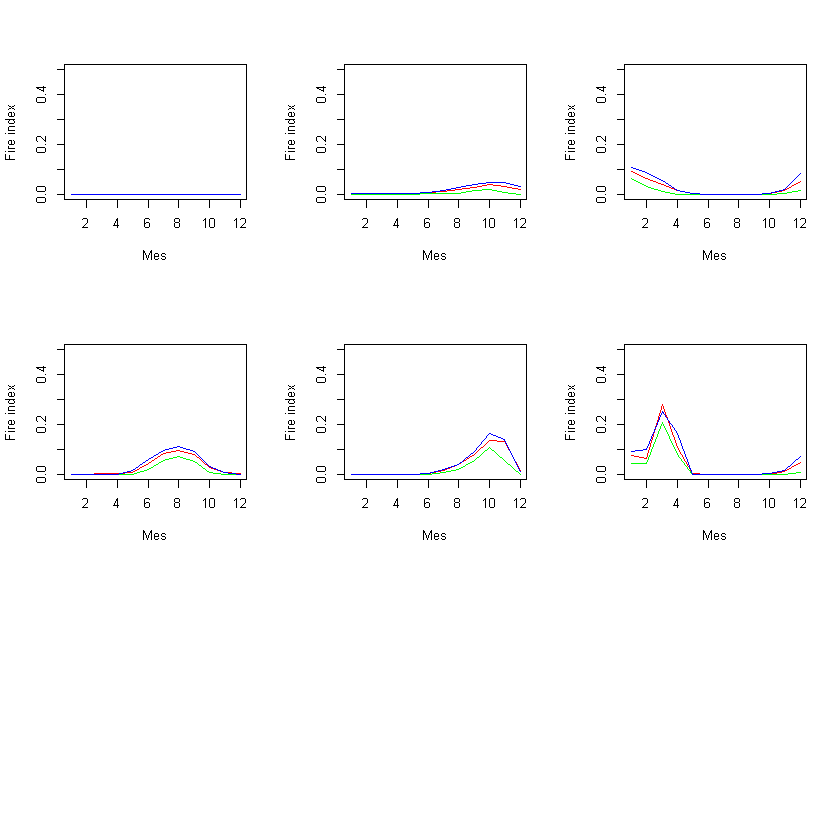

In [85]:
# si cogemos k=6
k = 6
som <- som(as.matrix(df[-naind, ]), somgrid(xdim=3, ydim=2, topo="rectangular"))
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(som$unit.classif == i),])
    d[i] = sum((df[-naind, ][which(som$unit.classif == i),] - centroide)^2) / sum(som$unit.classif == i)
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.5), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(som$unit.classif == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(som$unit.classif == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
    #points(quantile(df[-naind, ][which(hc10 == i),], prob=c(0.25,0.75)))
    #points(centroide - d)
    #dd[i] = sum(var(df[-naind, ][which(hc10 == i),]))
    #centr = list(centr, centroide)
    #d[i] = sum(parDist(as.matrix(df[-naind, ][which(hc10 == i),]), method = "euclidean")) / sum(which(hc10 == i))
}

In [32]:
install.packages("")

package 'kohonen' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Marcos\AppData\Local\Temp\Rtmpy4dmIT\downloaded_packages


# 6 clusters

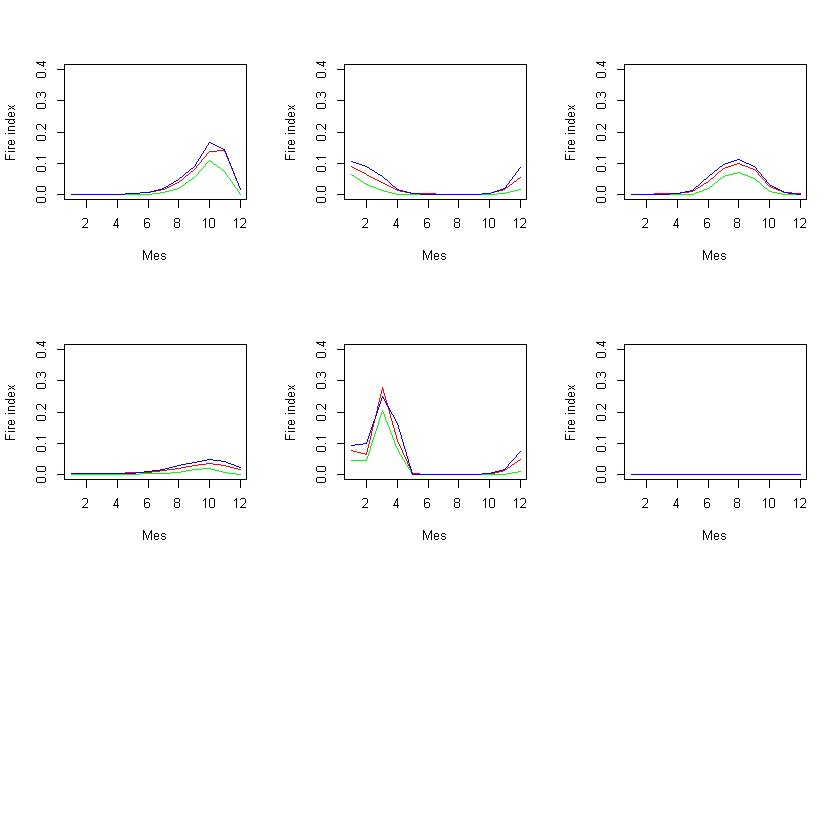

In [100]:
# K-MEANS
k = 6
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(km.15[[6]]$cluster == i),])
    d[i] = sum((df[-naind, ][which(km.15[[6]]$cluster == i),] - centroide)^2) / km.15[[6]]$size[i]
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.4), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(km.15[[6]]$cluster == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(km.15[[6]]$cluster == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
}

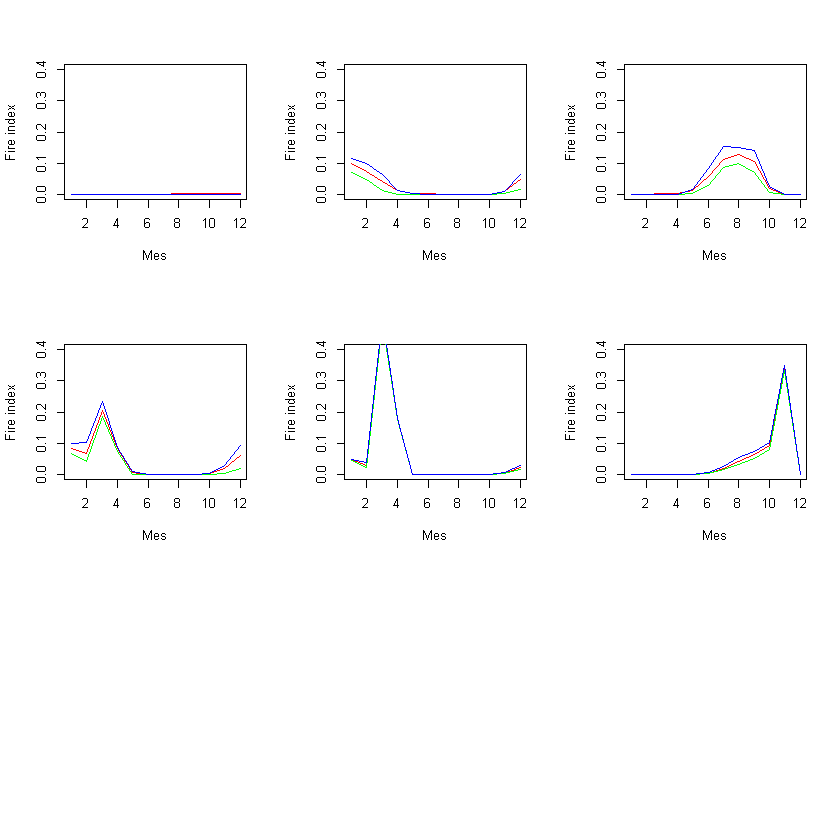

In [101]:
# AGLOMERATIVO
k = 6
hc6 <- cutree(clus, k = k)
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(hc6 == i),])
    d[i] = sum((df[-naind, ][which(hc6 == i),] - centroide)^2) / sum(hc6 == i)
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.4), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(hc6 == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(hc6 == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
}

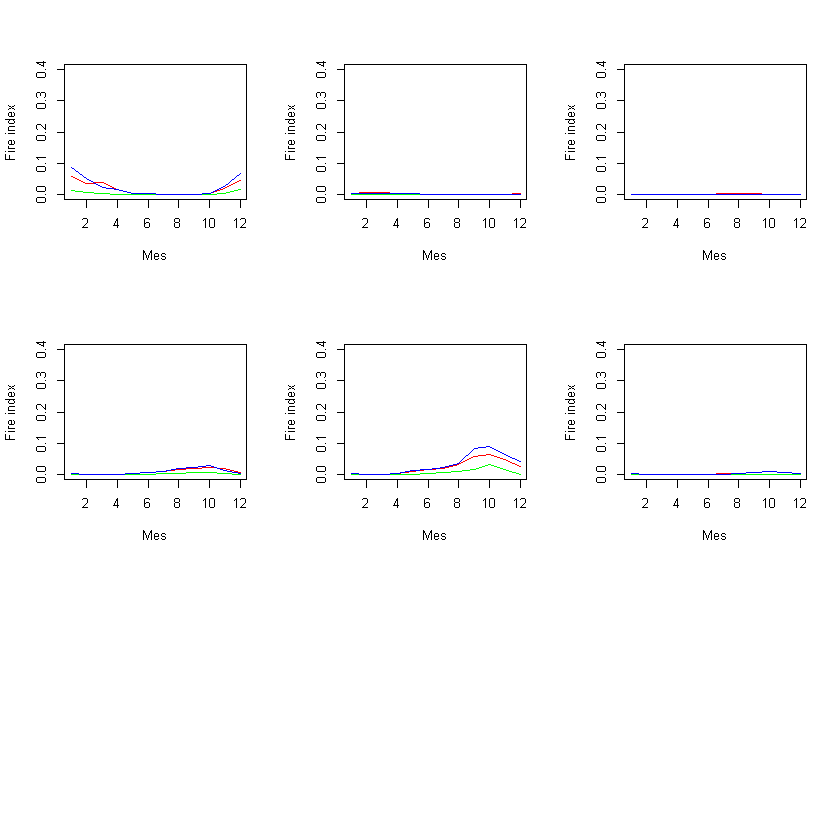

In [102]:
# GM
k = 6
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(gmm8$classification == i),])
    d[i] = sum((df[-naind, ][which(gmm8$classification == i),] - centroide)^2) / sum(gmm8$classification == i)
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.4), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(gmm8$classification == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(gmm8$classification == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
}

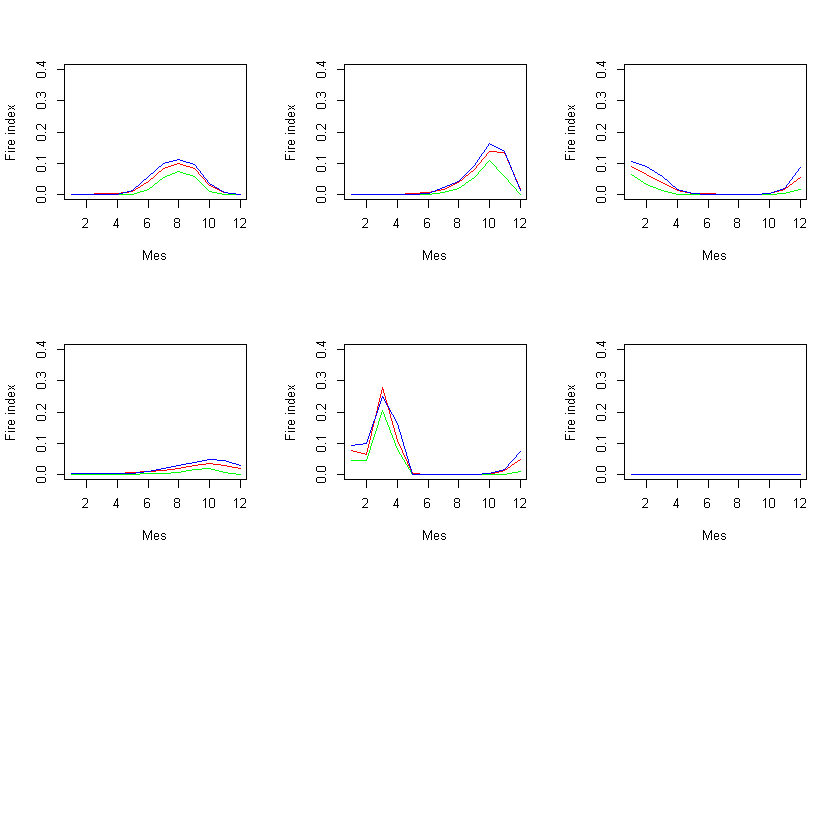

In [104]:
# SOM
k = 6
som <- som(as.matrix(df[-naind, ]), somgrid(xdim=3, ydim=2, topo="rectangular"))
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(som$unit.classif == i),])
    d[i] = sum((df[-naind, ][which(som$unit.classif == i),] - centroide)^2) / sum(som$unit.classif == i)
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.4), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(som$unit.classif == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(som$unit.classif == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
}

# 7 clusters

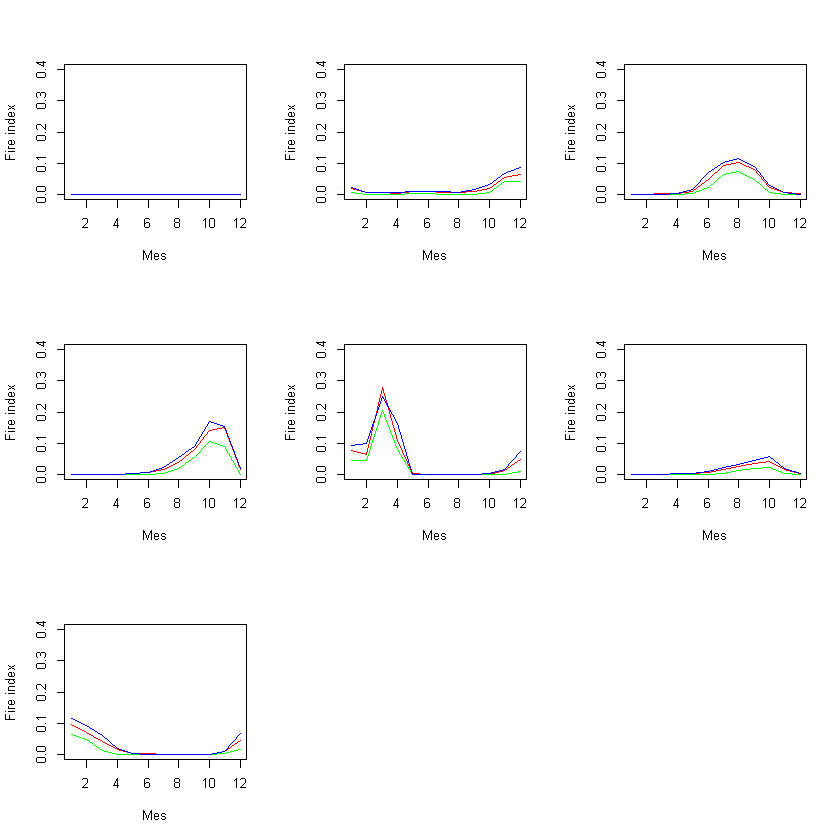

In [105]:
# K-MEANS
k = 7
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(km.15[[7]]$cluster == i),])
    d[i] = sum((df[-naind, ][which(km.15[[7]]$cluster == i),] - centroide)^2) / km.15[[7]]$size[i]
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.4), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(km.15[[7]]$cluster == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(km.15[[7]]$cluster == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
}

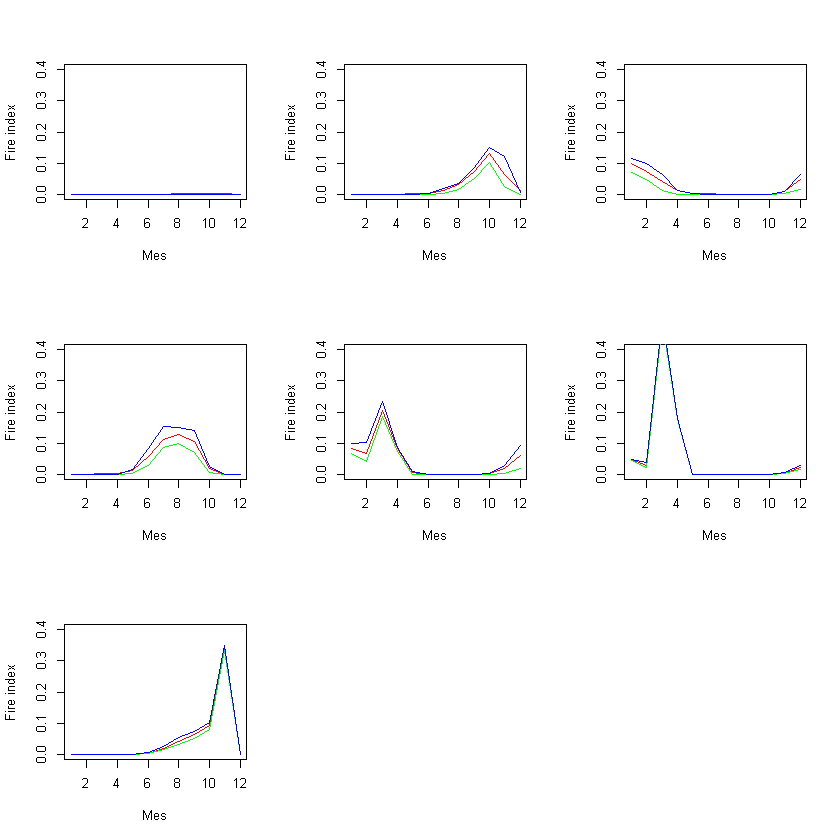

In [106]:
# AGLOMERATIVO
k = 7
hc7 <- cutree(clus, k = k)
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(hc7 == i),])
    d[i] = sum((df[-naind, ][which(hc7 == i),] - centroide)^2) / sum(hc7 == i)
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.4), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(hc7 == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(hc7 == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
}

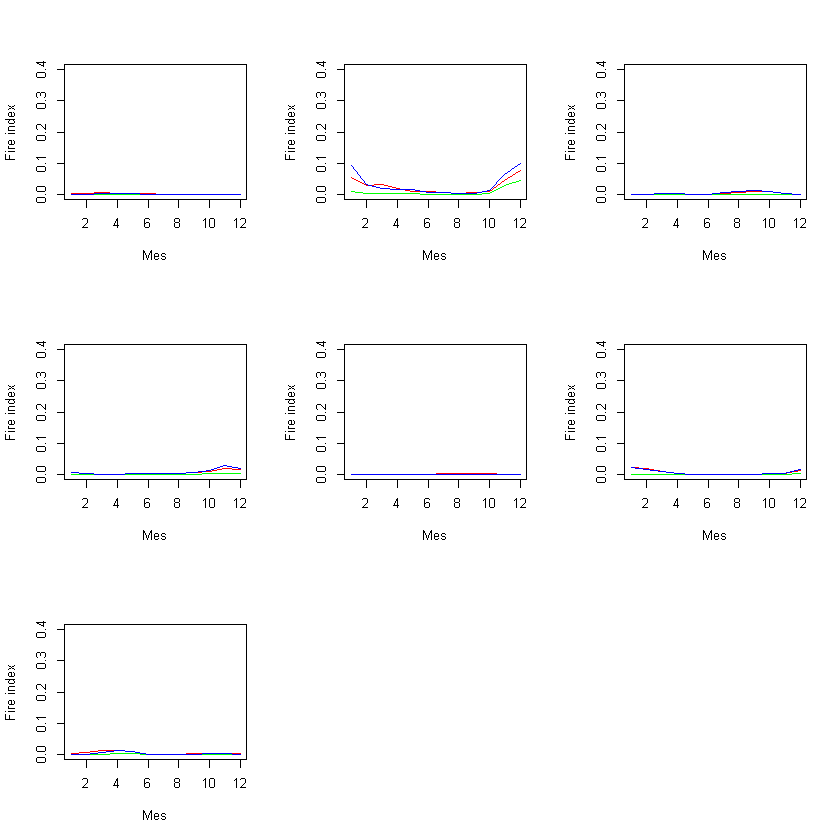

In [107]:
# GM
k = 7
par(mfrow = c(3, 3))
d=c()

for (i in 1:k){
    centroide = colMeans(df[-naind, ][which(gmm13$classification == i),])
    d[i] = sum((df[-naind, ][which(gmm13$classification == i),] - centroide)^2) / sum(gmm13$classification == i)
    plot(centroide, col = 'red', type = 'l', ylim = c(0, 0.4), xlab = "Mes", ylab = "Fire index")
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df[-naind, ][which(gmm13$classification == i),j], prob=0.25)
        per.75[j] = quantile(df[-naind, ][which(gmm13$classification == i),j], prob=0.75)
    }
    lines(1:12, per.25, col = "green")
    lines(1:12, per.75, col = "blue")
}